In [80]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#1. read csv from a file
df_nombres = pd.read_csv('nombres.csv')

In [8]:
df_nombres.head(5)

,state,sex,year,name,quantity
0,MO,F,1910,Mary,611
1,MO,F,1910,Helen,313
2,MO,F,1910,Dorothy,270
3,MO,F,1910,Mildred,267
4,MO,F,1910,Ruth,237


In [27]:
# 2. 
df_nombres.info()
df_nombres['year'] = df_nombres['year'].astype('Int32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5933561 entries, 0 to 5933560
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   state     object
 1   sex       object
 2   year      Int32 
 3   name      object
 4   quantity  int64 
dtypes: Int32(1), int64(1), object(3)
memory usage: 209.4+ MB


In [16]:
# null values
df_nombres.isnull().sum()

state       0
sex         0
year        0
name        0
quantity    0
dtype: int64

In [31]:
# 3.
df_ca_2000 = df_nombres[(df_nombres['state'] == 'CA') & (df_nombres['year'] == 2000)]
df_ca_2000.head(5)


,state,sex,year,name,quantity
1200071,CA,F,2000,Emily,2958
1200072,CA,F,2000,Ashley,2831
1200073,CA,F,2000,Samantha,2579
1200074,CA,F,2000,Jessica,2484
1200075,CA,F,2000,Jennifer,2263


In [34]:
# 4.
df_fem_ny_1995 = df_nombres[(df_nombres['sex'] == 'F') & (df_nombres['state'] == 'NY') & (df_nombres['year'] == 1995)]
df_fem_ny_1995.head(5)

,state,sex,year,name,quantity
4624286,NY,F,1995,Ashley,2055
4624287,NY,F,1995,Samantha,1892
4624288,NY,F,1995,Jessica,1852
4624289,NY,F,1995,Emily,1688
4624290,NY,F,1995,Amanda,1578


In [42]:
#5. 
df_name_group = df_nombres.groupby(['state', 'year'])['quantity'].sum().reset_index()
df_name_group.head(5)

,state,year,quantity
0,AK,1910,115
1,AK,1911,84
2,AK,1912,141
3,AK,1913,110
4,AK,1914,245


In [50]:
#6.
df_name_group = df_nombres.groupby(['name'])['quantity'].sum().reset_index()
df_name_group.head(5)
#print(df_nombres[df_nombres['name'] == 'Aadarsh'])


,name,quantity
0,Aaban,12
1,Aadan,23
2,Aadarsh,5
3,Aaden,4006
4,Aadhav,37


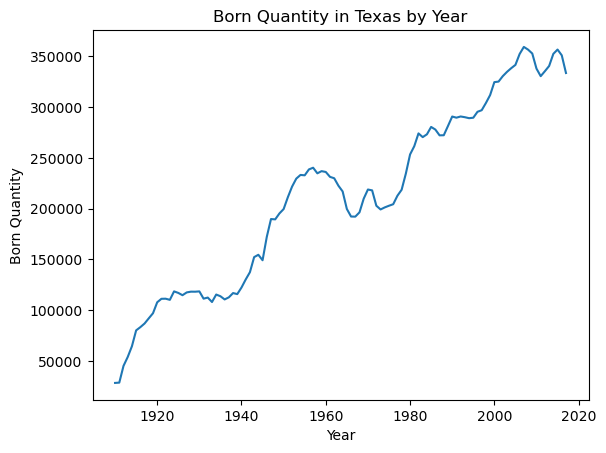

In [65]:
#7. 
df_tx_year = df_nombres[df_nombres['state'] == 'TX'].groupby(['year']).sum('quantity').reset_index()
#df_tx_year = df_tx.groupby(['year']).sum('quantity').reset_index()

plt.plot(df_tx_year['year'], df_tx_year['quantity'])
plt.xlabel('Year')
plt.ylabel('Born Quantity')
plt.title('Born Quantity in Texas by Year')
plt.show()

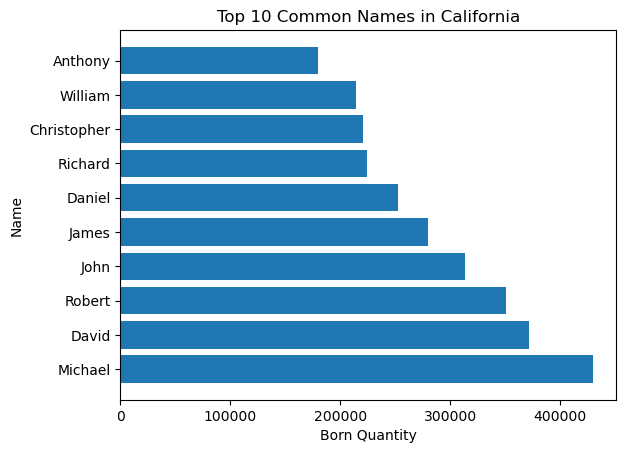

In [88]:
#8.
df_common_ca_top = df_nombres[df_nombres['state'] == 'CA'].groupby(['name'])['quantity'].sum().nlargest(10).reset_index()
plt.barh(df_common_ca_top['name'], df_common_ca_top['quantity'])
plt.ylabel('Name')
plt.xlabel('Born Quantity')
plt.title('Top 10 Common Names in California')
plt.show()

In [92]:
#9.
df_sex_fl = df_nombres[df_nombres['state'] == 'FL'].groupby(['sex'])['quantity'].sum().reset_index()
df_sex_fl.head(5)

,sex,quantity
0,F,4708858
1,M,5300114


In [99]:
#10.
df_year_top = df_nombres.groupby(['year'])['quantity'].sum().nlargest(1).reset_index()
df_year_top.head(5)

,year,quantity
0,1957,4002187


In [108]:
#11.
df_common_name_tx_2010 = df_nombres[(df_nombres['state'] == 'TX') & (df_nombres['sex'] == 'M') & (df_nombres['year'] == 2010)].groupby(['name'])['quantity'].sum().nlargest(1).reset_index()
df_common_name_tx_2010.head(5)


,name,quantity
0,Jacob,2273
